In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Unicorn_Companies.csv')

In [5]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [7]:
df.sample(8)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
53,Digital Currency Group,$10B,2021-11-01,Fintech,New York,United States,North America,2015,$1B,"Ribbit Capital, capitalG, Softbank Group"
780,Oda,$1B,2021-06-02,E-commerce & direct-to-consumer,Oslo,Norway,Europe,2013,$337M,"Kinnevik, Softbank Group, Prosus Ventures"
91,Carta,$7B,2019-05-06,Fintech,San Francisco,United States,North America,2012,$1B,"Menlo Ventures, Spark Capital, Union Square Ve..."
850,Sendbird,$1B,2021-04-06,Mobile & telecommunications,San Mateo,United States,North America,2013,$221M,"FundersClub, Y Combinator, Tiger Global Manage..."
157,Hopper,$5B,2021-03-24,Travel,Montreal,Canada,North America,2007,$599M,"Capital One Growth Ventures, Citi Ventures, OM..."
666,Orca Security,$1B,2021-03-23,Cybersecurity,Portland,United States,North America,2019,$632M,"YL Ventures, Redpoint Ventures, GGV Capital"
611,dMed Biopharmaceutical,$1B,2021-07-12,Health,Shanghai,China,Asia,2016,$214M,"Qiming Venture Partners, Vivo Capital, Sequoia..."
1058,VTS,$1B,2019-05-07,Internet software & services,New York,United States,North America,2012,$187M,"Trinity Ventures, Fifth Wall Ventures, OpenVie..."


In [11]:
df.shape

(1074, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [15]:
## converting valuation and funding into numeric values

def convert_to_numeric(values):
    if isinstance(values, str):
        if 'B' in values:
            return float(values.replace('$', '').replace('B', '')) * 1e9
        elif 'M' in values:
            return float(values.replace('$', '').replace('M','')) * 1e6
    return np.nan

df['Valuation'] = df['Valuation'].apply(convert_to_numeric)
df['Funding'] = df['Funding'].apply(convert_to_numeric)


In [19]:
## converting date joined datatype
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [25]:
df.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                    float64
Select Investors            object
dtype: object

Statistical Analysis

In [35]:
## numerical data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Valuation,1074.0,3455307262.569832,1000000000.0,1000000000.0,2000000000.0,3000000000.0,180000000000.0,8547022216.45056
Date Joined,1074,2020-05-19 15:35:51.955307264,2007-07-02 00:00:00,2019-05-20 06:00:00,2021-03-29 00:00:00,2021-09-19 18:00:00,2022-04-05 00:00:00,NaN
Year Founded,1074.0,2012.895717,1919.0,2011.0,2014.0,2016.0,2021.0,5.698573
Funding,1062.0,557269303.201507,0.0,223000000.0,370000000.0,609250000.0,14000000000.0,810133578.878257


In [39]:
## categorical data
df.describe(include="object")


,Company,Industry,City,Country,Continent,Select Investors
count,1074,1074,1058,1074,1074,1073
unique,1073,16,256,46,6,1058
top,Bolt,Fintech,San Francisco,United States,North America,Sequoia Capital
freq,2,224,152,562,589,3


In [43]:
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding             12
Select Investors     1
dtype: int64

In [47]:
## filling missing values with proper fillings

df['City'].fillna(df['City'].mode()[0],inplace=True)

df['Funding'].fillna(df['Funding'].median(),inplace=True)

df['Select Investors'].fillna('Unknown', inplace=True)

df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [51]:
df.duplicated().sum()

0

## EDA

In [85]:

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print('We have {} categorical data : {}'.format(len(categorical_features), categorical_features))
print('\nWe have {} numerical data : {}'.format(len(numeric_features), numeric_features))


We have 6 categorical data : ['Company', 'Industry', 'City', 'Country', 'Continent', 'Select Investors']

We have 4 numerical data : ['Valuation', 'Date Joined', 'Year Founded', 'Funding']


In [87]:
## proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print()
    print('----------***---------')


Company
Bolt               0.18622
Bytedance          0.09311
Yidian Zixun       0.09311
Klook              0.09311
Epirus             0.09311
                    ...   
eDaili             0.09311
ENOVATE            0.09311
Fenbi Education    0.09311
Hesai Tech         0.09311
Zwift              0.09311
Name: proportion, Length: 1073, dtype: float64

----------***---------
Industry
Fintech                                20.856611
Internet software & services           19.087523
E-commerce & direct-to-consumer        10.335196
Health                                  6.890130
Artificial intelligence                 6.797020
Other                                   5.400372
Supply chain, logistics, & delivery     5.307263
Cybersecurity                           4.655493
Data management & analytics             3.817505
Mobile & telecommunications             3.538175
Hardware                                3.165736
Auto & transportation                   2.886406
Edtech                     

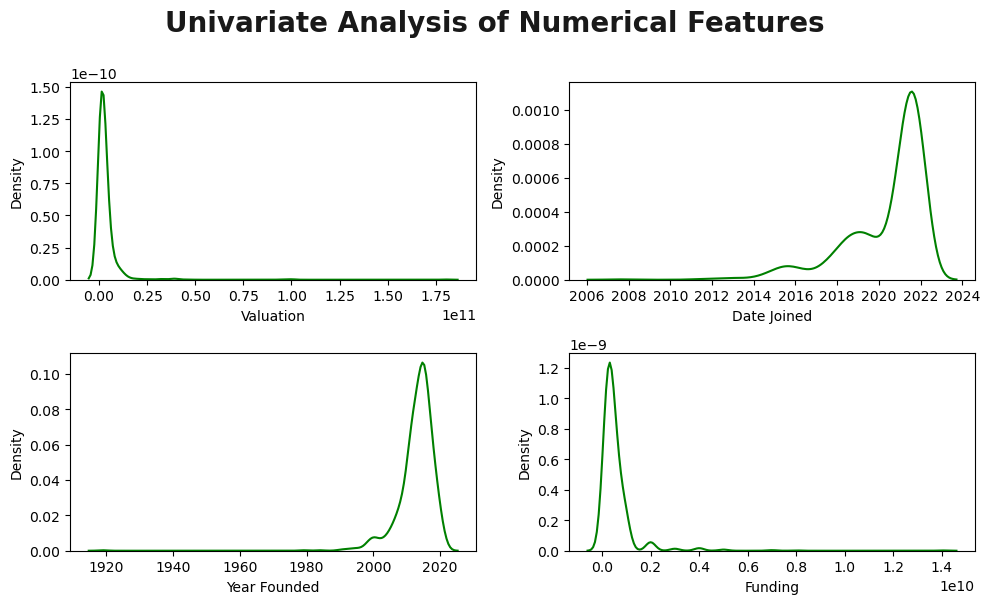

In [91]:
## numerical_feature univatiant analysis
import math

num_features = len(numeric_features)
rows = math.ceil(num_features / 2)  # Calculate number of rows

plt.figure(figsize=(10, 3 * rows))  # Adjust figure size based on the number of rows
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(num_features):
    plt.subplot(rows, 2, i+1)  # 2 columns for each row
    sns.kdeplot(x=df[numeric_features[i]], color='green')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

Valuation and Funding have Right skewness.

Date Joined and Year Founded have Left skewness.

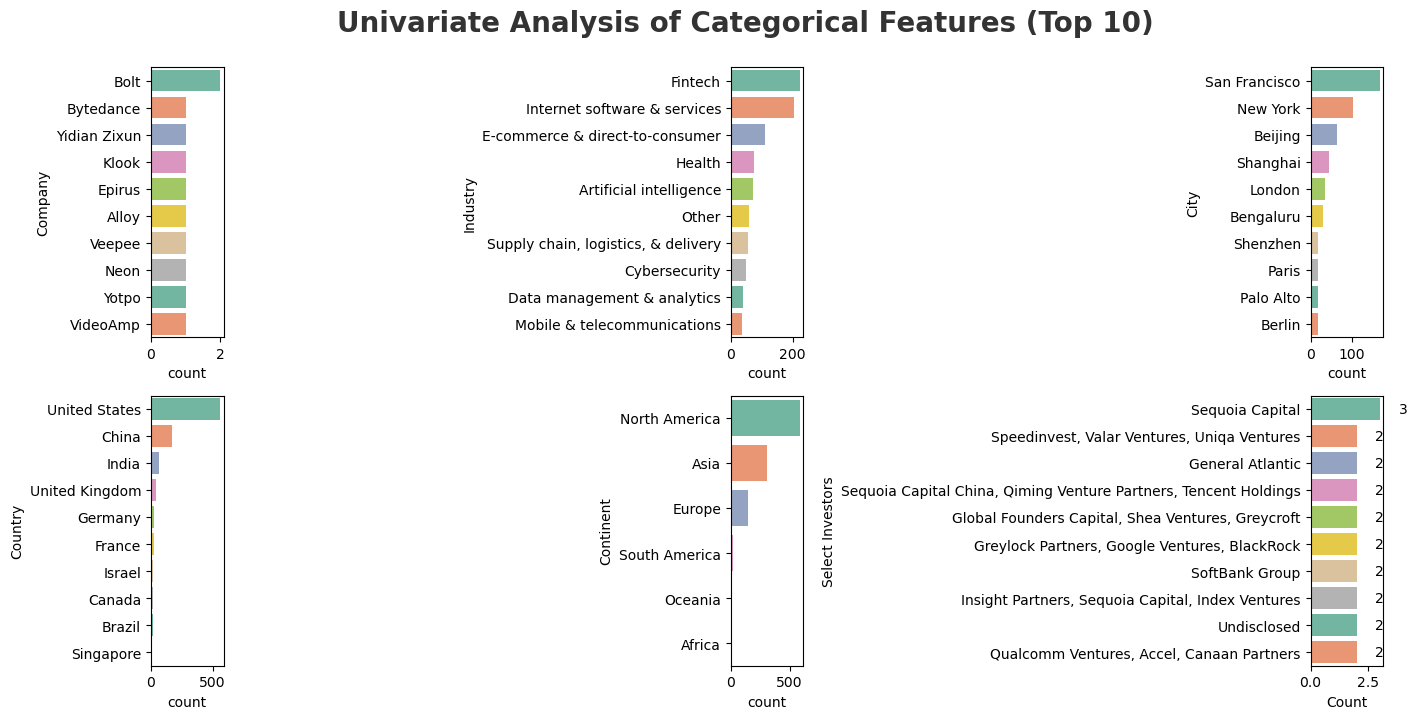

In [112]:
## Univariate analysis of Categorical Features

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Features (Top 10)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop through each categorical feature and plot the top 10 categories
for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)

    # Get the top 10 values for each categorical feature
    top_10_values = df[categorical_features[i]].value_counts().nlargest(10).index

    # Create countplot with custom color palette
    plot = sns.countplot(y=categorical_features[i], data=df[df[categorical_features[i]].isin(top_10_values)],
                         order=top_10_values, palette='Set2')

 # Annotate each bar with the corresponding count
   # Text properties

    # Set labels
plt.xlabel('Count')
plt.ylabel(categorical_features[i])

    # Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [114]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 4 continuous_features : ['Valuation', 'Date Joined', 'Year Founded', 'Funding']


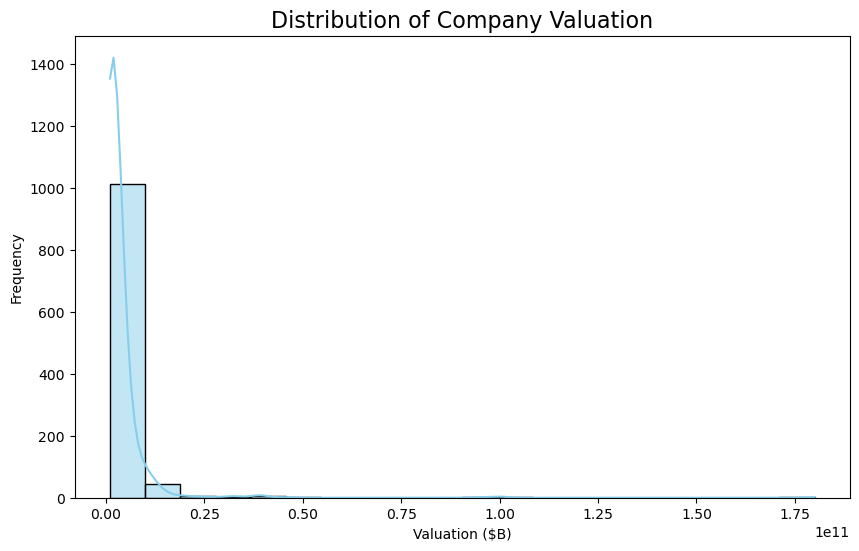

In [116]:
# 1. Distribution of Valuation
plt.figure(figsize=(10, 6))
sns.histplot(df['Valuation'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Company Valuation', fontsize=16)
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

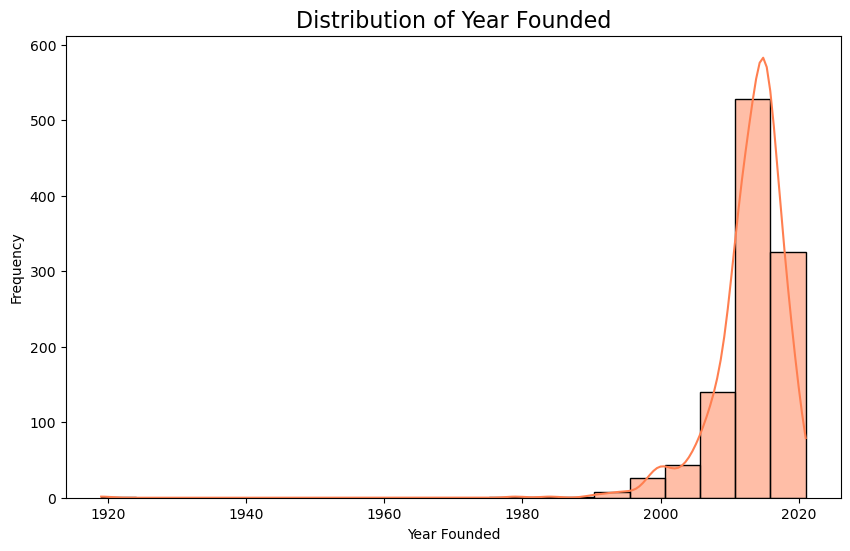

In [118]:
# 2. Year Founded distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Year Founded'], bins=20, kde=True, color='coral')
plt.title('Distribution of Year Founded', fontsize=16)
plt.xlabel('Year Founded')
plt.ylabel('Frequency')
plt.show()

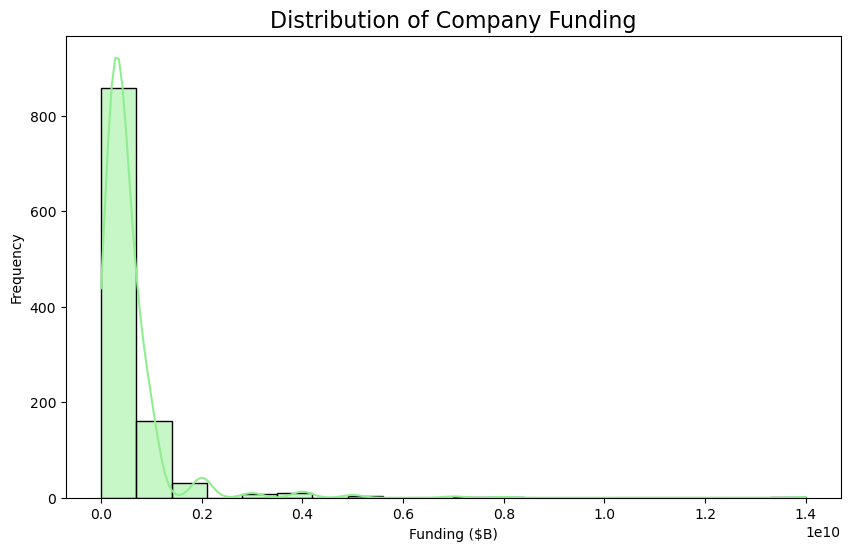

In [120]:
# 5. Distribution of Funding
plt.figure(figsize=(10, 6))
sns.histplot(df['Funding'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Company Funding', fontsize=16)
plt.xlabel('Funding ($B)')
plt.ylabel('Frequency')
plt.show()

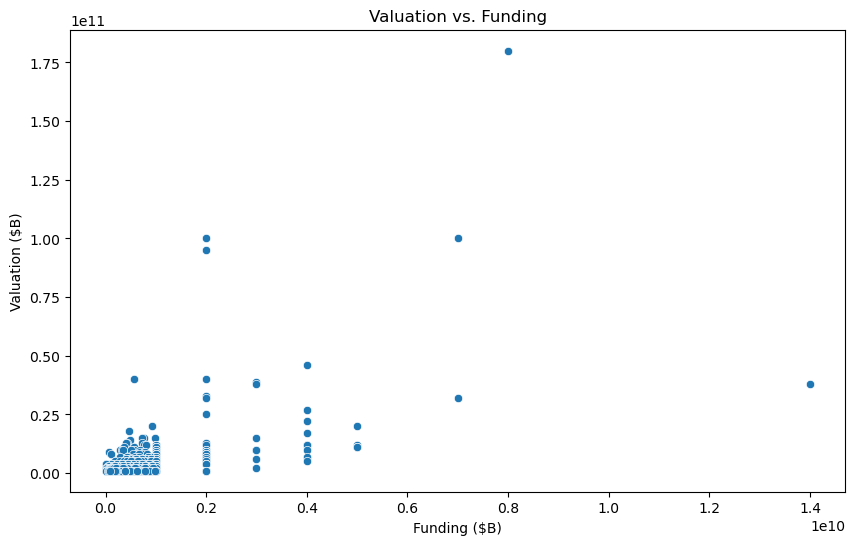

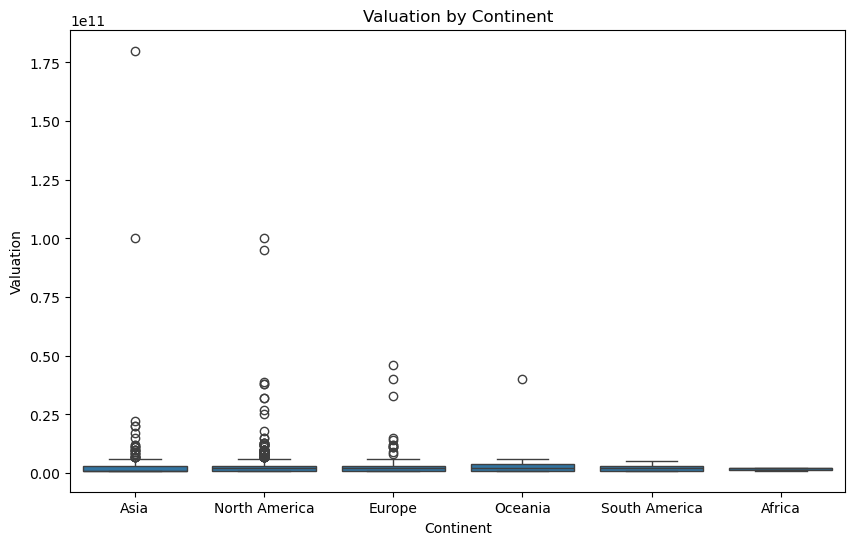

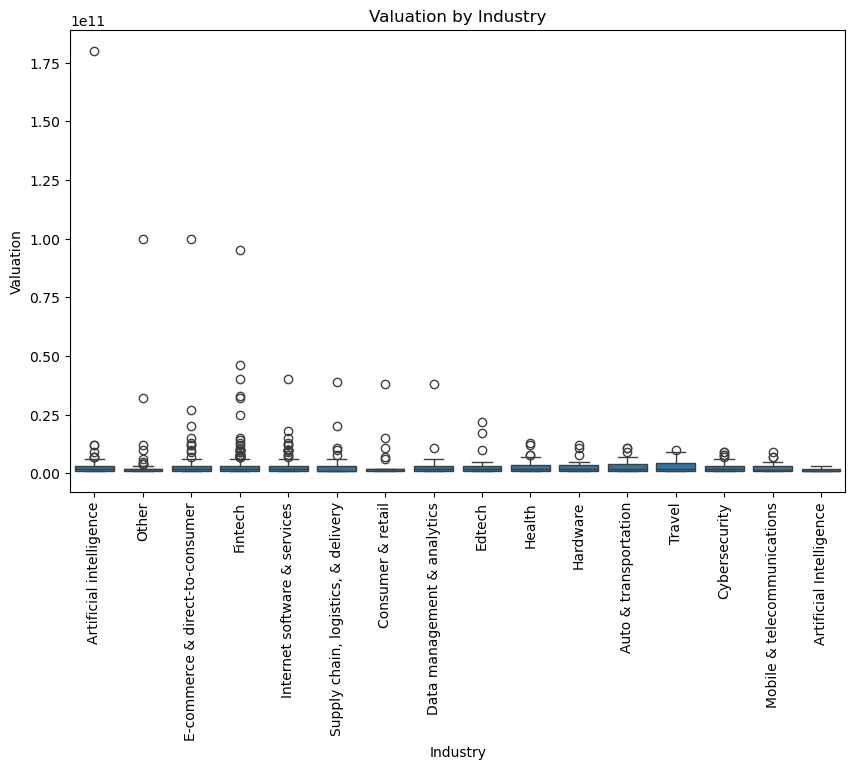

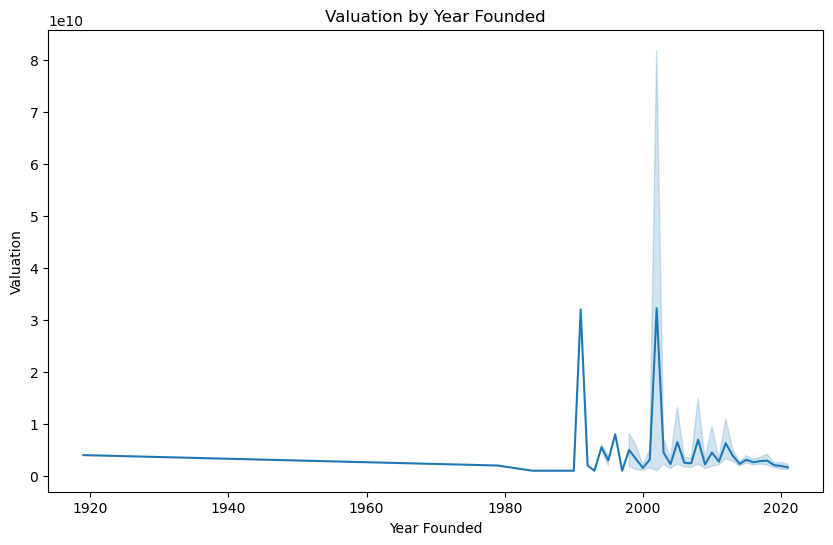

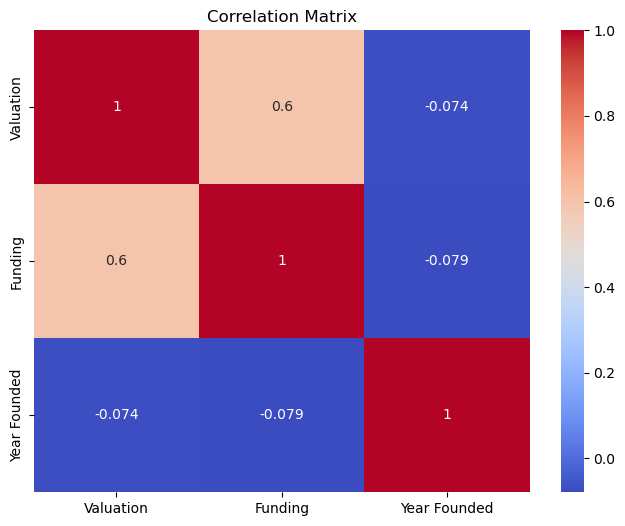

In [122]:
# 1. Valuation vs Funding (Scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Funding', y='Valuation', data=df)
plt.title('Valuation vs. Funding')
plt.xlabel('Funding ($B)')
plt.ylabel('Valuation ($B)')
plt.show()

# 2. Valuation by Continent (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Valuation', data=df)
plt.title('Valuation by Continent')
plt.show()

# 3. Valuation by Industry (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Valuation', data=df)
plt.xticks(rotation=90)
plt.title('Valuation by Industry')
plt.show()

# 4. Valuation by Year Founded (Line plot)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year Founded', y='Valuation', data=df)
plt.title('Valuation by Year Founded')
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Valuation', 'Funding', 'Year Founded']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


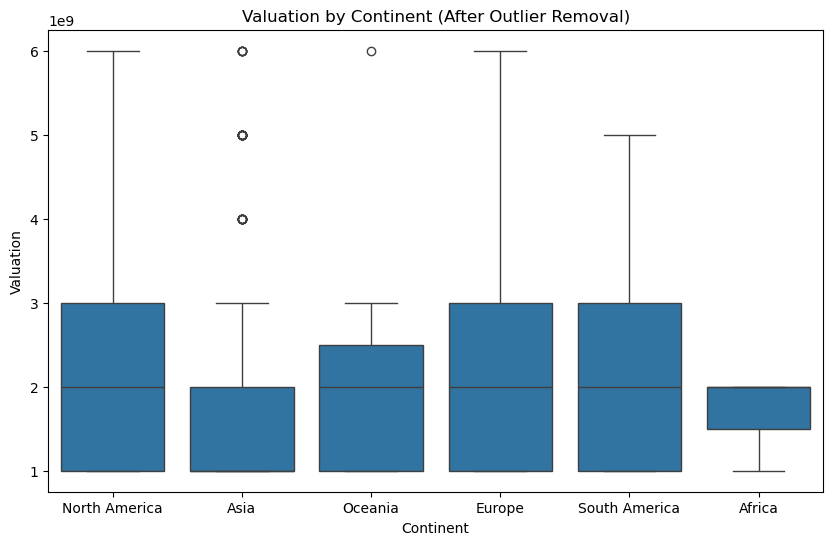

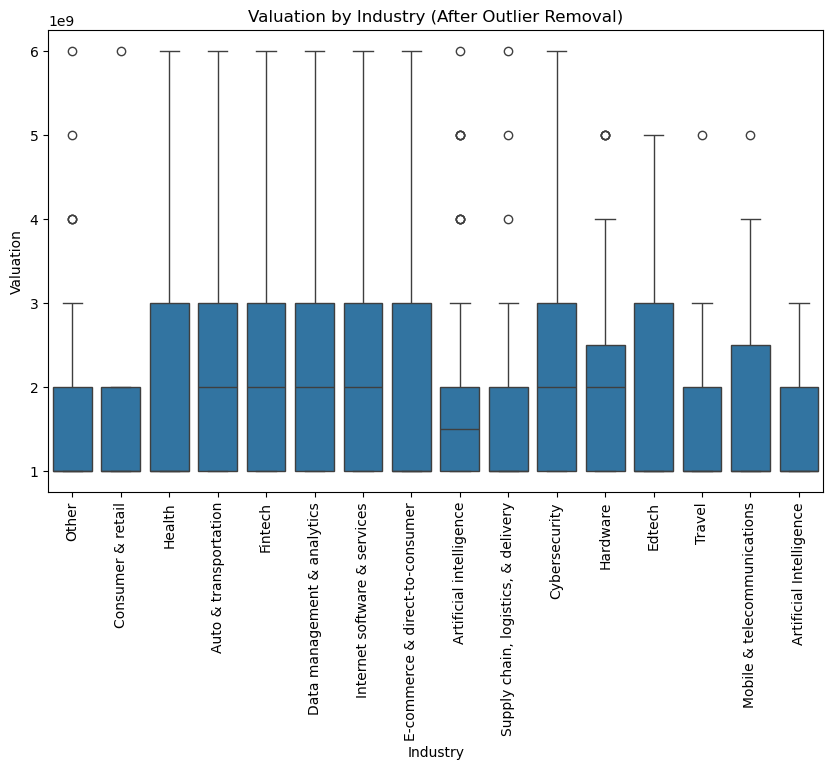

In [124]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Valuation'
df_no_outliers = remove_outliers(df, 'Valuation')

# 2. Valuation by Continent (Boxplot without outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Valuation', data=df_no_outliers)
plt.title('Valuation by Continent (After Outlier Removal)')
plt.show()

# 3. Valuation by Industry (Boxplot without outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Valuation', data=df_no_outliers)
plt.xticks(rotation=90)
plt.title('Valuation by Industry (After Outlier Removal)')
plt.show()